In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE 
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,average_precision_score,precision_recall_curve

# Infer Whether the client has subscribed a term deposit or not 

# Import and Analyse the Data 

In [2]:
bank=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/bank-full.csv",sep=';')

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank=bank.rename({"poutcome":"outcome"},axis=1)

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
outcome      0
y            0
dtype: int64

In [7]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,y


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  outcome    45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.shape

(45211, 17)

In [10]:
bank.y.value_counts() # Data is imbalanced

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
bank.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
# Assign values to the features with multi classes 
job={'job':{'blue-collar':1,'management':2,'technician':3,'admin.':4,'services':5,'retired':6,'self-employed':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'student':11,'unknown':12}}
marital={'marital':{'married':1,'single':2,'divorced':3}}
education={'education':{'secondary':1,'tertiary':2,'primary':3,'unknown':4}}
contact={'contact':{'cellular':1,'unknown':2,'telephone':3}}
outcome={'outcome':{'unknown':1,'failure':2,'other':3,'success':4}}
month={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}


In [13]:
bank=bank.replace(job)
bank=bank.replace(marital)
bank=bank.replace(education)
bank=bank.replace(contact)
bank=bank.replace(outcome)
bank=bank.replace(month)

In [14]:
#Other way is to apply lebel encoder 

# Applying Label Encoder to all categorical columns
#label_encoder=preprocessing.LabelEncoder()
#bank['job']= label_encoder.fit_transform(bank['job'])
#bank['marital']= label_encoder.fit_transform(bank['marital'])
#bank['education']= label_encoder.fit_transform(bank['education'])
#bank['default']= label_encoder.fit_transform(bank['default'])
#bank['housing']= label_encoder.fit_transform(bank['housing'])
#bank['loan']= label_encoder.fit_transform(bank['loan'])
#bank['Deposit_Subscribed']= label_encoder.fit_transform(bank['Deposit_Subscribed'])

In [15]:
bank.shape

(45211, 17)

In [16]:
# Custom Binary Encoding of Binary o/p variables 
bank["default"]=np.where(bank["default"].str.contains("yes"),1,0)
bank["housing"]=np.where(bank["housing"].str.contains("yes"),1,0)
bank["loan"]=np.where(bank["loan"].str.contains("yes"),1,0)
bank["y"]=np.where(bank["y"].str.contains("yes"),1,0)

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  outcome    45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


# Check the correlation between the Data 

In [18]:
bank.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,y
age,1.000000,0.077468,-0.126351,0.167296,-0.017879,0.097783,-0.185513,-0.015655,0.122114,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.012238,0.025155
job,0.077468,1.000000,0.050184,-0.002546,-0.003261,0.020404,-0.175678,-0.035331,0.011959,-0.010874,0.016169,0.004410,-0.025450,-0.020621,-0.002425,0.022384,0.059027
marital,-0.126351,0.050184,1.000000,-0.061597,0.018404,-0.028172,-0.011671,-0.018526,-0.038869,-0.005217,-0.044321,0.018834,-0.029294,0.020832,0.006876,0.020126,0.043846
education,0.167296,-0.002546,-0.061597,1.000000,-0.007520,0.039067,-0.076023,-0.068765,0.062967,-0.004675,0.010908,-0.003029,0.018643,-0.023103,-0.007463,-0.010689,0.009795
default,-0.017879,-0.003261,0.018404,-0.007520,1.000000,-0.066745,-0.006025,0.077234,0.000961,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.037940,-0.022419
balance,0.097783,0.020404,-0.028172,0.039067,-0.066745,1.000000,-0.068768,-0.084350,0.002844,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.037272,0.052838
housing,-0.185513,-0.175678,-0.011671,-0.076023,-0.006025,-0.068768,1.000000,0.041323,0.089783,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.000527,-0.139173
loan,-0.015655,-0.035331,-0.018526,-0.068765,0.077234,-0.084350,0.041323,1.000000,-0.015964,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.047586,-0.068185
contact,0.122114,0.011959,-0.038869,0.062967,0.000961,0.002844,0.089783,-0.015964,1.000000,-0.006302,-0.105285,-0.029350,0.046971,-0.170654,-0.091911,-0.169951,-0.100822
day,-0.009120,-0.010874,-0.005217,-0.004675,0.009424,0.004503,-0.027982,0.011370,-0.006302,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.072629,-0.028348


Text(0.5, 42.0, 'standard correlation')

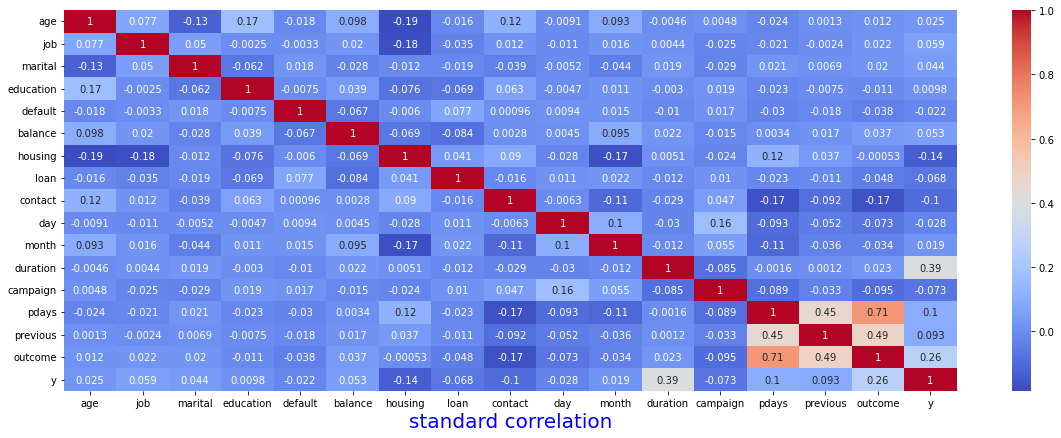

In [19]:
plt.figure(figsize=(20,7))
heatmap= sns.heatmap(bank.corr(),annot=True,cmap="coolwarm")
plt.xlabel("standard correlation",size=20,color="blue")



### All most all the features are independent to each other and target variable, we will just keep the data as it is 

# Divide Data into Input and ouput

In [20]:
X=bank.iloc[:,:16]
y=bank.iloc[:,16]

In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [22]:
y.shape

(45211,)

In [23]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

In [24]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((31647, 16), (31647,), (13564, 16), (13564,))

# Build the Model 

In [25]:
raw_model=LogisticRegression()
raw_model.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_train_pred=raw_model.predict(X_train)

In [27]:
y_test_pred=raw_model.predict(X_test)

In [28]:
y_pred_df=pd.DataFrame({'actual': y_train, 'predicted': y_train_pred})
y_pred_df


,actual,predicted
16670,0,0
20762,0,0
38057,0,0
15436,0,0
4736,0,0
...,...,...
692,0,0
14837,0,0
28802,0,0
45120,1,0


# Check Model Scores and Accuracy

In [29]:
raw_model.intercept_

array([-0.14125022])

In [30]:
raw_model.coef_

array([[-3.01157963e-02,  7.38831000e-02, -1.59473094e-01,
        -1.45857730e-01, -1.02733022e-02,  3.07132652e-05,
        -3.76608152e-01, -9.89412514e-02, -3.32625971e-01,
        -1.99640975e-02, -3.94680516e-02,  3.42068974e-03,
        -4.07918100e-01, -8.91977796e-04,  1.50433807e-01,
         2.88772858e-01]])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_pred,y_train)

array([[27381,  2949],
       [  549,   768]])

In [32]:
confusion_matrix(y_test_pred,y_test)

array([[11764,  1285],
       [  228,   287]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     30330
           1       0.21      0.58      0.31      1317

    accuracy                           0.89     31647
   macro avg       0.59      0.74      0.62     31647
weighted avg       0.95      0.89      0.91     31647



In [34]:
rm=classification_report(y_train_pred,y_train,output_dict=True)

In [35]:
rm

{'0': {'precision': 0.980343716433942,
  'recall': 0.9027695351137488,
  'f1-score': 0.9399588053553037,
  'support': 30330},
 '1': {'precision': 0.2066182405165456,
  'recall': 0.5831435079726651,
  'f1-score': 0.30512514898688914,
  'support': 1317},
 'accuracy': 0.8894681960375391,
 'macro avg': {'precision': 0.5934809784752438,
  'recall': 0.742956521543207,
  'f1-score': 0.6225419771710965,
  'support': 31647},
 'weighted avg': {'precision': 0.948144883944821,
  'recall': 0.8894681960375391,
  'f1-score': 0.9135400002414793,
  'support': 31647}}

In [36]:
raw_model_train_p0=rm["0"]["precision"]
raw_model_train_p1=rm["1"]["precision"]
raw_model_train_r0=rm["0"]["recall"]
raw_model_train_r1=rm["1"]["recall"]
raw_model_train_ac=rm["accuracy"]

In [37]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13049
           1       0.18      0.56      0.28       515

    accuracy                           0.89     13564
   macro avg       0.58      0.73      0.61     13564
weighted avg       0.95      0.89      0.91     13564



In [38]:
rm1=classification_report(y_test_pred,y_test,output_dict=True)

In [39]:
raw_model_test_p0=rm1["0"]["precision"]
raw_model_test_p1=rm1["1"]["precision"]
raw_model_test_r0=rm1["0"]["recall"]
raw_model_test_r1=rm1["1"]["recall"]
raw_model_test_ac=rm1["accuracy"]

### The data is still imbalanced with class 0 having 89% of the data and class 1 having 11% of the data
### we will focus on recall and precision as the data is not balanced

<AxesSubplot:xlabel='y', ylabel='count'>

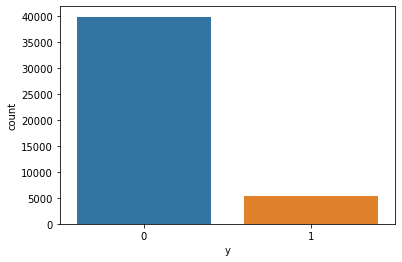

In [40]:
sns.countplot(bank["y"])

In [41]:
from sklearn.metrics import accuracy_score as ac
ac(y_train,y_train_pred)

0.8894681960375391

In [42]:
confusion_matrix(y_train_pred,y_train)

array([[27381,  2949],
       [  549,   768]])

In [43]:
prob=raw_model.predict_proba(X_train)[:,1]
probs=raw_model.predict_proba(X_test)[:,1]

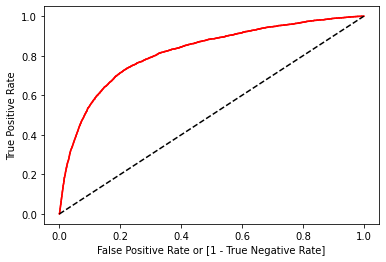

auc accuracy: 0.819791108887943


In [44]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_train,prob)
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_train,prob)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [45]:
pd.DataFrame({
    'fpr':fpr,
    'tpr':tpr,
    'thr':thresholds,
}).head(100)

,fpr,tpr,thr
0,0.000000,0.000000,2.000000
1,0.000036,0.000000,1.000000
2,0.000107,0.000000,0.999942
3,0.000107,0.000269,0.999914
4,0.000215,0.000269,0.999717
...,...,...,...
95,0.002793,0.028787,0.888529
96,0.002828,0.028787,0.888251
97,0.002828,0.029056,0.887157
98,0.002864,0.029056,0.886681


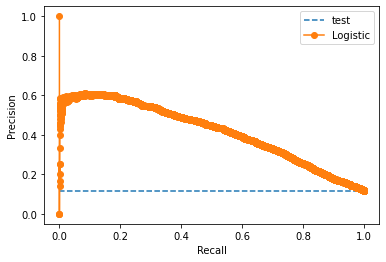

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train,prob)


# plot the roc curve for the model
test = len(y_train[y_train==1]) / len(y_train)# (3686/31647)
plt.plot([0,1], [test,test], linestyle='--', label='test') # baseline is fraction of +ve cases
plt.plot(recall, precision, marker='o', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

# Plot PR CURVE with defining thresholds

In [47]:
from sklearn.preprocessing import Binarizer
def pr_curve_with_threshold(y_true,thresholds):
    xax=[]
    yax=[]
    for thr in thresholds:
        pred=Binarizer(threshold=thr).fit_transform([prob]).ravel()
        tn,fp,fn,tp = confusion_matrix(y_train, pred).ravel()
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        xax.append(recall)
        yax.append(precision)
    return xax,yax

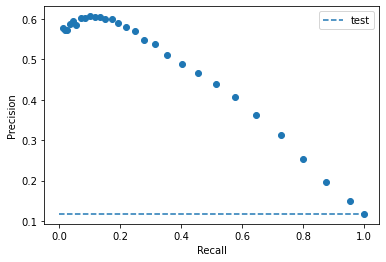

In [48]:
# collecting only 30 thresold points to find the best Precission recall balance score
xax,yax=pr_curve_with_threshold(y_train,np.linspace(0,1,30))
plt.scatter(xax,yax)
test = len(y_train[y_train==1]) / len(y_train)# (3686/31647)
plt.plot([0,1], [test,test], linestyle='--', label='test') # baseline is fraction of +ve cases
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()




# Plot ROC curve with tresholds

In [49]:
from sklearn.preprocessing import Binarizer
def roc_curve_with_threshold(y_true,thresholds):
    xax=[]
    yax=[]
    for thr in thresholds:
        pred=Binarizer(threshold=thr).fit_transform([prob]).ravel()
        tn,fp,fn,tp = confusion_matrix(y_train, pred).ravel()
        fpr1=fp/(fp+tn)
        tpr1=tp/(tp+fn)
        xax.append(fpr1)
        yax.append(tpr1)
    return xax,yax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


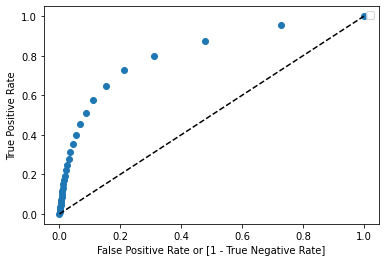

In [50]:
# collecting only 30 thresold points to find the best Precission recall balance score
xax,yax=roc_curve_with_threshold(y_train,np.linspace(0,1,30))
plt.scatter(xax,yax)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

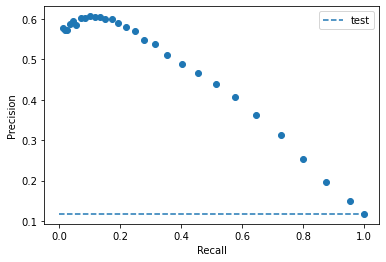

In [51]:
# collecting only 30 thresold points to find the best Precission recall balance score
xax,yax=pr_curve_with_threshold(y_train,np.linspace(0,1,30))
plt.scatter(xax,yax)
test = len(y_train[y_train==1]) / len(y_train)# (3686/31647)
plt.plot([0,1], [test,test], linestyle='--', label='test') # baseline is fraction of +ve cases
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()



In [52]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = np.linspace(0,1,30)
#thresholds = np.arange(0, 1, 0.6)
scores = [f1_score(y_train, to_labels(prob, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.207, F-Score=0.47629


In [53]:
from sklearn.metrics import roc_auc_score,average_precision_score

In [54]:
roc_auc_score(y_train,prob),average_precision_score(y_train,prob)

(0.819791108887943, 0.4172096148089731)

# Inference:
- The original data is imbalancd with an accuracy score of accuracy= 0.89, 
- [:,1] Threshold value>0.5=1, else [:,0] Threshold value<0.5=0
- As the accuracy value is greater than 0.5 , it signifies the overall classification of has less error, 
- however if we check the precision and recall, we can see the accuracy is more driven by class 0 with high precision than class 1. This highlights the high % of custromers are correctly "not subscribed" for term deposit, where as model prediction for subscribed customers(class 1) is erroneous. 
- checking the presion curve we also find the best threshold point is around ".45 precsion region" (30 threshld points), where precision and recall is balanced.
- best threshold value is .2 , i.e we have max tpr above this point 

# Creting a model with Balancing the Data for model fitting purpose only 

In [55]:
from imblearn.over_sampling import KMeansSMOTE

ksm = KMeansSMOTE(random_state=42,cluster_balance_threshold=0.2)

print('Original dataset shape %s' % Counter(y))

X_ksm, y_ksm = ksm.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_ksm))

Original dataset shape Counter({0: 39922, 1: 5289})
After undersample dataset shape Counter({0: 39922, 1: 39922})


In [56]:
#split the data 
X_train_ksm,X_test_ksm,y_train_ksm,y_test_ksm=train_test_split(X_ksm,y_ksm,test_size=0.3,shuffle=True)

In [57]:
model_km=LogisticRegression()
model_km.fit(X_train_ksm,y_train_ksm)

LogisticRegression()

In [58]:
y_train_ksm_pred=model_km.predict(X_train_ksm)
y_test_ksm_pred=model_km.predict(X_test_ksm)

### We will focus on Accuracy as the data is balanced

In [65]:
from sklearn.metrics import accuracy_score as ac
ac(y_train_ksm,y_train_ksm_pred)

0.9129898013955985

In [59]:
print(classification_report(y_train_ksm_pred,y_train_ksm))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27906
           1       0.91      0.91      0.91     27984

    accuracy                           0.91     55890
   macro avg       0.91      0.91      0.91     55890
weighted avg       0.91      0.91      0.91     55890



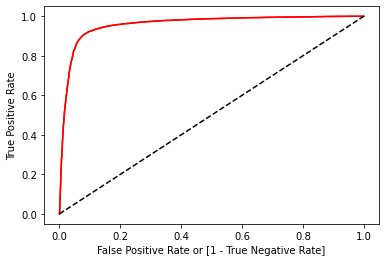

auc accuracy: 0.9581970590782696


In [64]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y_train_ksm,model_km.predict_proba(X_train_ksm)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_train_ksm,model_km.predict_proba(X_train_ksm)[:,1])

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [61]:
km=classification_report(y_train_ksm_pred,y_train_ksm,output_dict=True)
km1=classification_report(y_test_ksm_pred,y_test_ksm,output_dict=True)

In [62]:
model_km_train_p0=km["0"]["precision"]
model_km_train_p1=km["1"]["precision"]
model_km_train_r0=km["0"]["recall"]
model_km_train_r1=km["1"]["recall"]
model_km_train_ac=km["accuracy"]

model_km_test_p0=km1["0"]["precision"]
model_km_test_p1=km1["1"]["precision"]
model_km_test_r0=km1["0"]["recall"]
model_km_test_r1=km1["1"]["recall"]
model_km_test_ac=km1["accuracy"]

# Result comparision between imbalanced and balanced data

In [63]:
results={'Models':['raw_model_train','raw_model_test','model_km_train','model_km_test'],
    'precision0':[raw_model_train_p0,raw_model_test_p0,model_km_train_p0,model_km_test_p0],
    'precision1':[raw_model_train_p1,raw_model_test_p1,model_km_train_p1,model_km_test_p1],
    'recall0':[raw_model_train_r0,raw_model_test_r0,model_km_train_r0,model_km_test_r0],
    'recall1':[raw_model_train_r1,raw_model_test_r1,model_km_train_r1,model_km_test_r1],
    'Accuracy':[raw_model_train_ac,raw_model_test_ac,model_km_train_ac,model_km_test_ac]    }
#   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9]}
output=pd.DataFrame(results)
output

,Models,precision0,precision1,recall0,recall1,Accuracy
0,raw_model_train,0.980344,0.206618,0.902770,0.583144,0.889468
1,raw_model_test,0.980987,0.182570,0.901525,0.557282,0.888455
2,model_km_train,0.912646,0.913333,0.913137,0.912843,0.912990
3,model_km_test,0.917757,0.916172,0.916611,0.917323,0.916966


## Prediction: 
- As we can see when the model is balanced, the accuracy score is more than 90% ,additionally we can also see high precision and recall score. 
  and the area under curve is more than 95% which means the model fits the values correctly.

### Question:

### Please let me know if it is a good approach to apply standard scaler on robust scaler data in presence of outliers??? 
    